In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import umap
from sklearn.manifold import MDS, TSNE

In [2]:
# Dataset info
with open("data/flag.names") as file:
    for line in file:
        print(line)

1. TItle: Flag database



2. Source Information

   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":

      Collins Publishers (1986).

   -- Donor: Richard S. Forsyth 

             8 Grosvenor Avenue

             Mapperley Park

             Nottingham NG3 5DX

             0602-621676

   -- Date: 5/15/1990



3. Past Usage:

   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.



4. Relevant Information:

   -- This data file contains details of various nations and their flags.

      In this file the fields are separated by spaces (not commas).  With

      this data you can try things like predicting the religion of a country

      from its size and the colours in its flag.  

   -- 10 attributes are numeric-valued.  The remainder are either Boolean-

      or nominal-valued.



5. Number of Instances: 194



6. Number of attributes: 30 (overall)



7. Attribute Information:

   1. name	Name of the country concerned

   2. landm

In [3]:
df = pd.read_csv("data/flag.data")
df.count

<bound method DataFrame.count of                name  landmass  zone  area  population  language  religion  \
0       Afghanistan         5     1   648          16        10         2   
1           Albania         3     1    29           3         6         6   
2           Algeria         4     1  2388          20         8         2   
3    American-Samoa         6     3     0           0         1         1   
4           Andorra         3     1     0           0         6         0   
..              ...       ...   ...   ...         ...       ...       ...   
189   Western-Samoa         6     3     3           0         1         1   
190      Yugoslavia         3     1   256          22         6         6   
191           Zaire         4     2   905          28        10         5   
192          Zambia         4     2   753           6        10         5   
193        Zimbabwe         4     2   391           8        10         5   

     bars  stripes  colours  ...  saltires

In [4]:
# поиск более объёмной фичи
categorical_features = ['topleft','botright','mainhue']
feature_nunique = {f: df[f].nunique() for f in categorical_features}
print(f'feature_nunique = {feature_nunique}')
vol_feature = max(feature_nunique, key=feature_nunique.get)

feature_nunique = {'topleft': 7, 'botright': 8, 'mainhue': 8}


In [5]:
le = LabelEncoder()

le.fit(df[vol_feature])

for feature in categorical_features:
    df[feature] = le.transform(df[feature])
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,0,4
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,6,6
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,4,7
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,1,6
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,1,6
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,1,6
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,4,4
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,4,2


In [6]:
# separate names of countries and it's flags info
y = df.name
X = df.copy()

# deleting extra info about countries, that does not applies to flags
X.drop(columns=['name','landmass','zone','area','population','language','religion'], axis=1, inplace=True)
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.43798986,  0.62379634,  1.18451852, ..., -0.29981268,
        -1.74945956,  0.        ],
       [-0.43798986, -0.66819466, -0.35774049, ..., -0.29981268,
         0.69810165,  0.87480626],
       [ 1.49314725, -0.66819466, -0.35774049, ..., -0.29981268,
        -0.11775209,  1.31220939],
       ...,
       [-0.43798986, -0.66819466,  0.41338901, ..., -0.29981268,
        -0.11775209,  0.        ],
       [ 2.4587158 , -0.66819466,  0.41338901, ..., -0.29981268,
        -0.11775209, -0.87480626],
       [-0.43798986,  2.34645101,  1.18451852, ..., -0.29981268,
        -0.11775209,  0.        ]])

[[ 7.5269856   0.65408456]
 [ 5.6695843   2.3570135 ]
 [14.256747   11.680139  ]
 [ 9.489664    1.4971371 ]
 [ 6.9354477  -0.74238807]
 [ 6.7053127   0.73732954]
 [ 8.300651    7.390856  ]
 [ 9.248663    1.2225076 ]
 [ 9.219893    8.896632  ]
 [ 9.0897875   8.5678625 ]
 [-5.437626    5.5943894 ]
 [ 5.46451     6.166141  ]
 [ 9.303867    2.1361947 ]
 [ 5.702214    6.3198223 ]
 [ 5.352429    0.8552611 ]
 [ 7.0822973  -0.5937835 ]
 [ 6.9353795  -0.60310376]
 [ 7.795719    2.7481596 ]
 [ 5.4635096   0.74742573]
 [-3.795171    5.523506  ]
 [ 6.1574283   6.179111  ]
 [ 5.9586267   1.3170305 ]
 [ 9.313681    8.782126  ]
 [ 7.056587    3.425262  ]
 [-3.7861602   5.314574  ]
 [ 8.471153    1.9907919 ]
 [ 6.924951    2.6701386 ]
 [ 5.829892    1.2267427 ]
 [ 4.3408594   4.764563  ]
 [ 6.078835    6.01443   ]
 [ 6.797917   -1.3152503 ]
 [ 7.2884097   5.743842  ]
 [ 8.639088    3.630608  ]
 [-3.7980287   5.278001  ]
 [ 6.396966    3.80756   ]
 [ 6.891777   -0.7877208 ]
 [ 4.56298     5.02763   ]
 

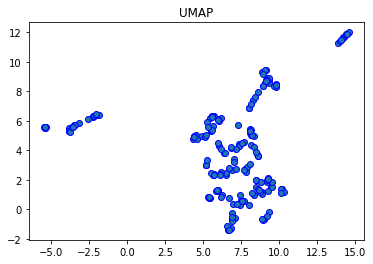

In [40]:
umap_emb = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, metric='euclidean')
show_reduced = umap_emb.fit_transform(X_std)
umap_reduced = show_reduced
print(show_reduced)
fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b', )
ax.set_title('UMAP')
plt.show()

/Users/dima/University/10_sem/neuro/repo/ENV/lib/python3.8/site-packages/umap/spectral.py:106: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'CPUDispatcher' requested from: 'numba.targets.registry', please update to use 'numba.core.registry' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  ) == numba.targets.registry.CPUDispatcher and scipy.sparse.isspmatrix(data):


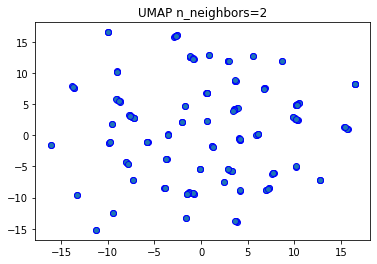

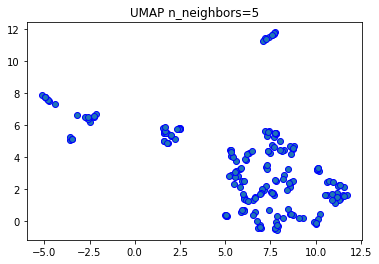

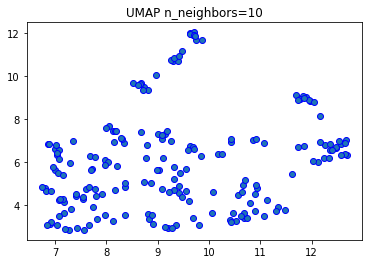

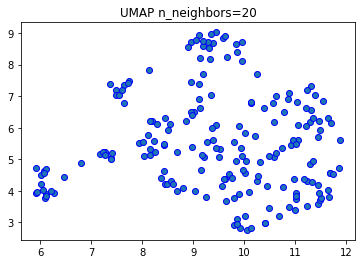

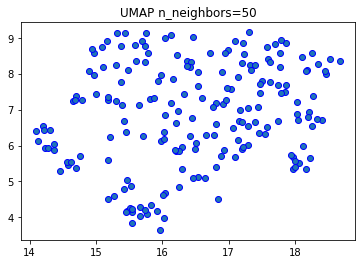

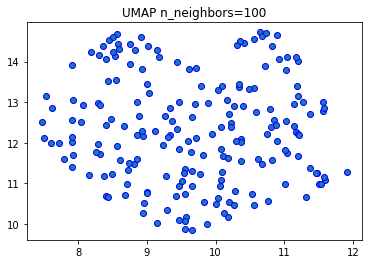

In [33]:
for n in (2, 5, 10, 20, 50, 100):
    umap_emb = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, metric='euclidean')

    show_reduced = umap_emb.fit_transform(X_std)
    fig, ax = plt.subplots()
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b', )
    ax.set_title(f'UMAP n_neighbors={n}')
    plt.show()

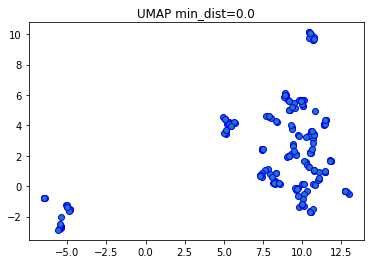

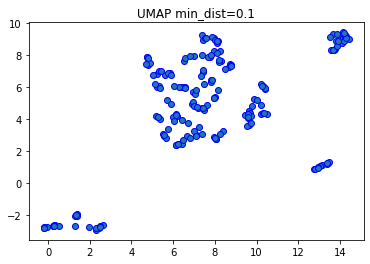

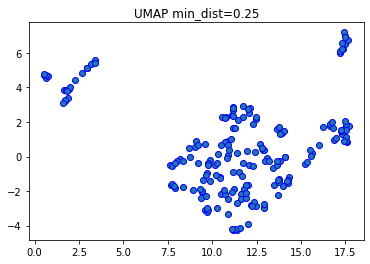

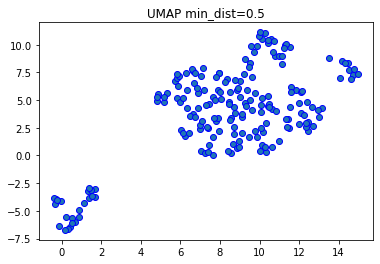

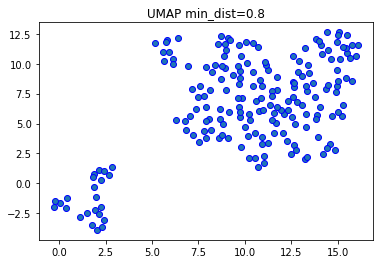

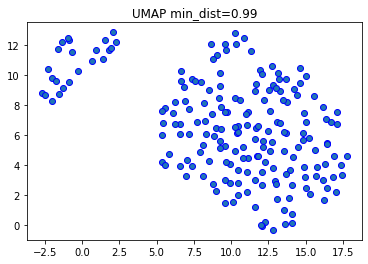

In [36]:
for dist in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    umap_emb = umap.UMAP(n_neighbors=5, min_dist=dist, n_components=2, metric='euclidean')

    show_reduced = umap_emb.fit_transform(X_std)
    fig, ax = plt.subplots()
    ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b', )
    ax.set_title(f'UMAP min_dist={dist}')
    plt.show()


Изначальная размерность: (194, 23)
Уменьшенная размерность: (194, 2)


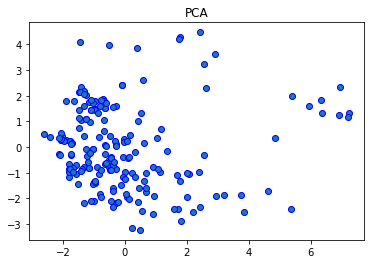

In [20]:
pca = PCA(n_components=2)
show_reduced = pca.fit_transform(X_std)
print()
print(f'Изначальная размерность: {X_std.shape}')
print(f'Уменьшенная размерность: {show_reduced.shape}')
fig, ax = plt.subplots()  # Рисуем двумерную картинку.
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b')
ax.set_title('PCA')
plt.show()

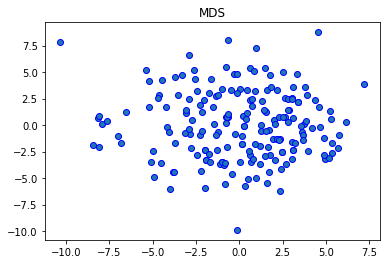

In [25]:
mds = MDS(random_state=42)
show_reduced = mds.fit_transform(X_std)
fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b',)
ax.set_title('MDS')
plt.show()

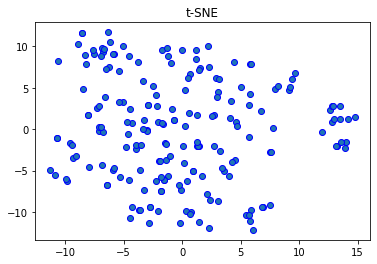

In [26]:
tsne = TSNE()
show_reduced = tsne.fit_transform(X_std)
fig, ax = plt.subplots()
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b', )
ax.set_title('t-SNE')
plt.show()

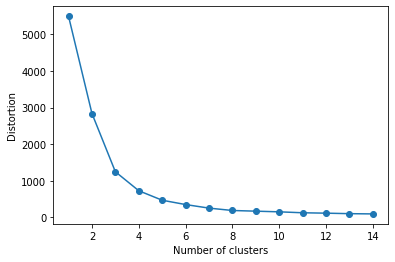

In [45]:
# Elbow method to find better number of clusters
distortions = []

# umap_reduced = show_reduced
# print(show_reduced)
# fig, ax = plt.subplots()
# ax.scatter(show_reduced[:, 0], show_reduced[:, 1], edgecolor='b', )

n = 15
for i in range(1, n):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(umap_reduced)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, n), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:
# the elbow is located at number of clusters = 4,
# which is evidence that number of clusters = 4 is indeed a good choice for this dataset

In [46]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0,init='random',
    n_init=10, max_iter=300, 
    tol=1e-04).fit(umap_reduced)

In [47]:
kmeans.labels_

array([2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 0, 3, 2, 3, 2, 2, 2, 2, 2, 0, 3, 2,
       1, 3, 0, 2, 2, 2, 3, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3, 1, 2, 0, 1, 1,
       2, 2, 0, 2, 3, 1, 3, 2, 1, 2, 2, 0, 0, 0, 0, 3, 3, 3, 1, 3, 2, 2,
       2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3, 3, 2, 3, 1, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 0, 1,
       1, 2, 3, 1, 3, 1, 0, 2, 2, 1, 1, 3, 3, 0, 1, 3, 3, 0, 1, 2, 0, 3,
       1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 1, 1, 2, 1, 0,
       3, 2, 2, 3, 0, 2, 2, 2, 2, 3, 2, 1, 0, 2, 3, 2, 3, 3, 0, 2, 1, 1,
       0, 0, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2], dtype=int32)

In [48]:
for i in range(n_clusters):
    print(f"{i}-cluster:\n")
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            print(y[j])
    print("\n")    

0-cluster:

Australia
Bermuda
British-Virgin-Isles
Cayman-Islands
Cook-Islands
Denmark
Faeroes
Falklands-Malvinas
Fiji
Finland
Hong-Kong
Malta
Montserrat
New-Zealand
Niue
Norway
South-Africa
St-Helena
Switzerland
Tonga
Turks-Cocos-Islands
Tuvalu
UK


1-cluster:

Algeria
Argentina
Argentine
Botswana
Comorro-Islands
Costa-Rica
Cuba
Dominican-Republic
El-Salvador
Gabon
Greece
Guatemala
Honduras
Iceland
Israel
Maldive-Islands
Marianas
Mauritania
Micronesia
Mongolia
Nauru
Nepal
Nicaragua
North-Korea
Pakistan
San-Marino
Sierra-Leone
Singapore
Somalia
Sweden
Tunisia
Turkey


2-cluster:

Afghanistan
Albania
American-Samoa
Andorra
Angola
Antigua-Barbuda
Bahamas
Bangladesh
Barbados
Belgium
Belize
Benin
Bolivia
Brunei
Bulgaria
Burkina
Cameroon
Chad
China
Congo
Cyprus
Czechoslovakia
Djibouti
Egypt
Equatorial-Guinea
Ethiopia
Germany-DDR
Germany-FRG
Ghana
Gibraltar
Grenada
Guam
Guinea
Guinea-Bissau
Guyana
Haiti
Iraq
Jamaica
Jordan
Kampuchea
Kenya
Kiribati
Kuwait
Libya
Malawi
Mali
Mauritius
Morocco
M